In [0]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2019-01-01 13:56:50--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [0]:
#!rm -r flower_data

In [0]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [7]:
!pip install Pillow==4.0.0
!pip install PIL
!pip install image

  Using cached https://files.pythonhosted.org/packages/37/e8/b3fbf87b0188d22246678f8cd61e23e31caa1769ebc06f1664e2e5fe8a17/Pillow-4.0.0-cp36-cp36m-manylinux1_x86_64.whl
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL


In [0]:
#imports
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torchvision import datasets, transforms,models
import helper
from torch.autograd import Variable
import torch.nn.functional as F
from torch.optim import lr_scheduler
      

In [0]:
!wget -cq https://github.com/udacity/pytorch_challenge/raw/master/cat_to_name.json


In [0]:
#download the dataset
!wget -cq https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip

!unzip -qq flower_data.zip

In [0]:
#directories
train_dir='flower_data/train'
valid_dir='flower_data/valid'


In [0]:
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
#define transforms
train_transforms=transforms.Compose([transforms.RandomRotation(30),
                                     transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])
valid_transforms=transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])

#load data
image_dataset=dict()
image_dataset['train']=datasets.ImageFolder(train_dir,transform=train_transforms)
image_dataset['valid']=datasets.ImageFolder(valid_dir,transform=valid_transforms)


#prepare data loaders
dataloaders=dict()
dataloaders['train']=torch.utils.data.DataLoader(image_dataset['train'],batch_size=32,shuffle=True)

dataloaders['valid']=torch.utils.data.DataLoader(image_dataset['valid'],batch_size=32,shuffle=True)



In [0]:
#label mapping
import json
with open('cat_to_name.json', 'r') as f:

    flower_to_name = json.load(f)


In [0]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [0]:
#create a yor neural artitechture
    model=models.resnet152(pretrained=True)
    for params in model.parameters():
      params.requires_grad=False
    #build your classifier
    from collections import OrderedDict
    classifier=nn.Sequential(OrderedDict([
        ('fc1',nn.Linear(2048,1024)),
        ('relu',nn.ReLU()),
        ('droput',nn.Dropout(p=0.5)),
        ('h1',nn.Linear(1024,102)),
        ('output',nn.LogSoftmax(dim=1))]))
    model.fc=classifier
    

def forward(model,x):
  x=model(x)
  return x
    


In [0]:

Optimizer=optim.Adam(model.fc.parameters(), lr=0.001)
Criterion=nn.CrossEntropyLoss()
Scheduler=optim.lr_scheduler.StepLR(Optimizer,step_size=6, gamma=0.1)

In [15]:

model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [79]:
!ls /content/gdrive

'My Drive'


In [0]:
#save model
def savemodel(model,model_save_name):
  model.class_to_idx =image_dataset['train'].class_to_idx
  path=F"/content/gdrive/My Drive/{model_save_name}"
  torch.save({'arch': 'resnet152',
            'state_dict': model.state_dict(), 
            'fc1':2048,
            'h1':1024,
            'outputs':102,
            'class_to_idx': model.class_to_idx}, 
            model_save_name)


In [0]:
def load_model(model,model_save_name):
  path=F"/content/gdrive/My Drive/{model_save_name}"
  chpt = torch.load(model_save_name)
  model.class_to_idx = chpt['class_to_idx']
    
  #build your classifier
  from collections import OrderedDict
  classifier=nn.Sequential(OrderedDict([
        ('fc1',nn.Linear(2048,1024)),
        ('relu',nn.ReLU()),
        ('droput',nn.Dropout(p=0.5)),
        ('h1',nn.Linear(1024,102)),
        ('output',nn.LogSoftmax(dim=1))]))
        
  
    

  # Put the classifier on the pretrained network
  model.fc= classifier
    
  model.load_state_dict(chpt['state_dict'])
    
  return model

In [0]:
#train
def trainmodel(model,epochs,optimizer,Criterion,scheduler):
  device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
 
  steps=0
  print_every=5
  valid_loss_min=np.Inf
  for epoch in range(epochs):
    scheduler.step()
    steps+=1
    running_loss=0
    model.train()
    for images,labels in dataloaders['train']:  
      images,labels=images.to(device),labels.to(device)
      #clear gradients
      Optimizer.zero_grad()
      #forwardpass
      output=forward(model,images)
      #loss
      loss=Criterion(output,labels)
      #bacward pass
      loss.backward()
      #update weights
      Optimizer.step()
      running_loss+=loss.item()*images.size(0)
      
    else:
      valid_loss=0
      accuracy=0
      model.eval()
      with torch.set_grad_enabled(False):

        for images,labels in dataloaders['valid']:

          
          images,labels=images.to(device),labels.to(device)

          outputV=forward(model,images)
          lossV=Criterion(outputV,labels)
          valid_loss+=lossV.item()*images.size(0)
          #get accuracy
          ps=torch.exp(outputV)
          top_p,top_class=ps.topk(1,dim=1)
          equals=top_class==labels.view(*top_class.shape)
          accuracy+=torch.mean(equals.type(torch.FloatTensor))

    print(f"Epochs:{epoch+1}/{epochs}...",
               f"trainloss: {running_loss/len(dataloaders['train']):.3f}...",
               f"Accuracy:{accuracy/len(dataloaders['valid']):.3f}....")
        
         
       #save model when validation loss has decreased
    if valid_loss<=valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        savemodel(model,'classifier.pth')
        valid_loss_min=valid_loss
            
            
    
    

In [25]:
trainmodel(model,10,Optimizer,Criterion,Scheduler)

Epochs:1/10... trainloss: 52.478... Accuracy:0.826....
Validation loss decreased (inf --> 634.594101).  Saving model ...
Epochs:2/10... trainloss: 43.490... Accuracy:0.869....
Validation loss decreased (634.594101 --> 446.865872).  Saving model ...
Epochs:3/10... trainloss: 39.984... Accuracy:0.895....
Validation loss decreased (446.865872 --> 377.767458).  Saving model ...
Epochs:4/10... trainloss: 36.689... Accuracy:0.907....
Validation loss decreased (377.767458 --> 324.152638).  Saving model ...
Epochs:5/10... trainloss: 29.989... Accuracy:0.909....
Validation loss decreased (324.152638 --> 284.921546).  Saving model ...
Epochs:6/10... trainloss: 28.501... Accuracy:0.926....
Validation loss decreased (284.921546 --> 270.261332).  Saving model ...
Epochs:7/10... trainloss: 28.200... Accuracy:0.929....
Validation loss decreased (270.261332 --> 256.124815).  Saving model ...
Epochs:8/10... trainloss: 28.351... Accuracy:0.921....
Epochs:9/10... trainloss: 26.763... Accuracy:0.926....
V

In [27]:
savemodel(model,'classifier.pth')
load_model(model,'classifier.pth')

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:
def process_image(image_path):
    ''' 
    Scales, crops, and normalizes a PIL image for a PyTorch       
    model, returns an Numpy array
    '''
    # Open the image
    from PIL import Image
    img = Image.open(image_path)

    # Resize
    if img.size[0] > img.size[1]:
        img.thumbnail((10000, 256))
    else:
        img.thumbnail((256, 10000))

    # Crop 
    left_margin = (img.width-224)/2
    bottom_margin = (img.height-224)/2
    right_margin = left_margin + 224
    top_margin = bottom_margin + 224

    img = img.crop((left_margin, bottom_margin, right_margin,   
                      top_margin))
    # Normalize
    img = np.array(img)/255
    mean = np.array([0.485, 0.456, 0.406]) #provided mean
    std = np.array([0.229, 0.224, 0.225]) #provided std
    img = (img - mean)/std
    
    # Move color channels to first dimension as expected by PyTorch
    img = img.transpose((2, 0, 1))
    
    return img

In [0]:
image=process_image('flower_data/valid/10/image_07094.jpg')

In [0]:
def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()

    if title:
        plt.title(title)

    # PyTorch tensors assume the color channel is first
    # but matplotlib assumes is the third dimension
    image = image.transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

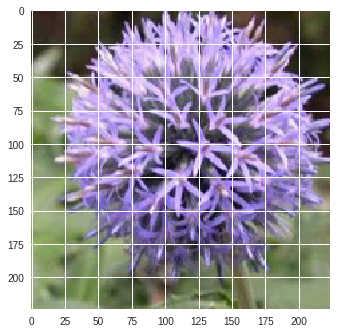

In [32]:
imshow(image)

In [0]:
  #class prediction
  def predict(image_path, model, top_num=5,flowermaps= flower_to_name):
    device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.cpu()
    # Process image
    img = process_image(image_path)
    
    # Numpy -> Tensor
    image_tensor = torch.from_numpy(img).type(torch.FloatTensor).cpu()
    
    # Add batch of size 1 to image
    model_input = image_tensor.unsqueeze(0)
    
    # Probs
    probs = torch.exp(model.forward(model_input))
    
    # Top probs
    top_probs, top_labs = probs.topk(top_num)
    top_probs = top_probs.detach().numpy().tolist()[0] 
    top_labs = top_labs.detach().numpy().tolist()[0]
    
    # Convert indices to classes
    idx_to_class = {val: key for key, val in model.class_to_idx.items()}
    label_map=flowermaps
    top_labels = [idx_to_class[lab] for lab in top_labs]
    top_flowers = [label_map[idx_to_class[lab]] for lab in top_labs]

    return top_probs, top_labels, top_flowers

In [34]:
predict('flower_data/valid/10/image_07094.jpg',model)

([0.6750836968421936,
  0.2434021681547165,
  0.032042719423770905,
  0.02169901877641678,
  0.011214163154363632],
 ['10', '38', '22', '14', '92'],
 ['globe thistle',
  'great masterwort',
  'pincushion flower',
  'spear thistle',
  'bee balm'])

In [0]:
#sanity check
import seaborn as sns
def plot_solution(image_path, model,label_map=flower_to_name):
    # Set up plot
    plt.figure(figsize = (6,10))
    ax = plt.subplot(2,1,1)

    # Set up title
    flower_num = image_path.split('/')[2]
    title_ = label_map[flower_num]

    # Plot flower
    img = process_image(image_path)
    imshow(img, ax, title = title_);

    # Make prediction
    probs, labs, flowers = predict(image_path, model) 

    # Plot bar chart
    plt.subplot(2,1,2)
    sns.barplot(x=probs, y=flowers, color=sns.color_palette()[0]);
    plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


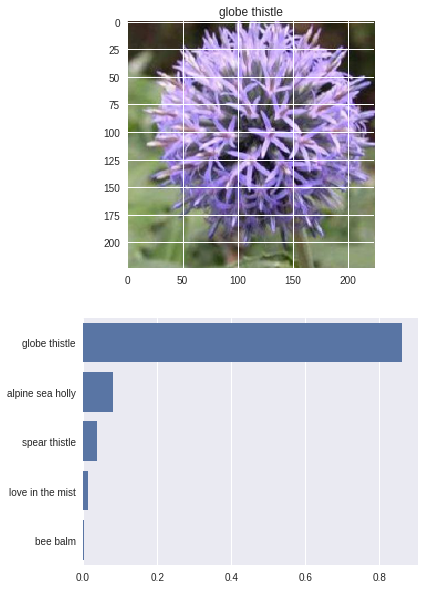

In [36]:
plot_solution('flower_data/valid/10/image_07094.jpg',model)